##Instructions




1. For every data visualization you make, add a proper description on the axes. Even if the variable name isn't terrible, explicitly add them. This is worth 1 point per axis per problem!
2. For each question asking you to make a calculation, you must add a comment or a markdown cell explicitly answering the question. **Python output alone is insufficient.**

## 0. Load Stuff

Load the `pandas`, `matplotib`,`seaborn`, and `geopandas`libraries.

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import geopandas as gpd

Load in the dataframe found [here](https://raw.githubusercontent.com/fivethirtyeight/data/refs/heads/master/voter-registration/new-voter-registrations.csv) as the variable `voters`. Make sure you are familiar with the data, whose origins are [here](https://github.com/fivethirtyeight/data/tree/master/voter-registration).

In [4]:
voters = pd.read_csv("https://raw.githubusercontent.com/fivethirtyeight/data/refs/heads/master/voter-registration/new-voter-registrations.csv")

##Introduction (10 points)
You've been hired to work with a government organization interested in formation about voter registration in the United States. They have asked you to come up with two research questions--one about national trends and one about a state trend of your choice.

Clearly state:
* the purpose of your project
* what the goal is
* why it is important for someone to read this notebook?

In additon, state your two research questions

* Question 1:
* Question 2:



*The purpose of my project is to record the patterns of change of voter registration in various states over the period of time from 2016-2020.*

*My goal of this project is to show that certain time periods are more likely to attract voters and observe the changes in voter registration as a whole. What I hope to accomplish in this project is to find a noticable pattern or trend that can account for an insight into which time periods or states show the highest voter registration, and in which areas can reach similar peaks.*

*It is important for someone to read this notebook to take advantage of the patterns glemaed from this dataset, and be able to apply this data to initiatives like voting campaigns, outreach, etc. to increase further voter turnout in the years to come.*

*Research Question 1: In which months for both 2016 and 2020 was voter registration the highest in the United States, and why could these months possibly be more popular?*

*Research Question 2: Has voter registration in northeastern states increased/decreased?*

## 1. Data Processing (8 points)

Show the first five rows of data and explain what the variable names are. (5 points)

In [5]:
voters.head(5)

,Jurisdiction,Year,Month,New registered voters
0,Arizona,2016,Jan,25852
1,Arizona,2016,Feb,51155
2,Arizona,2016,Mar,48614
3,Arizona,2016,Apr,30668
4,Arizona,2020,Jan,33229


*Jurisdiction: The state in which the data for new registerd voters was recorded*

*Year: The year in which the new registered voters was recorded for that state*

*Month: The month in which new registerd voters was recorded for that state*

*New registered voters: The number of new registered voters in a state during a certain time period, denoted by month and date*

Check for any missing data data. (1 point)

In [6]:
voters.isnull().values.any()

False

Check your data types. (1 point)

Rename the jurisdiction column to "NAME" and the "New registered voters" to "registered_voters" to use througout the notebook. (2 points)

In [7]:
voters.dtypes

,0
Jurisdiction,object
Year,int64
Month,object
New registered voters,int64


In [6]:
voters = voters.rename(columns = {"Jurisdiction": "NAME", "New registered voters": "registered_voters"})

Explain any potential limitations to your data (2 points)

*The data does not include some details that would be potential to explaining some more specific questions about the dataset. For example, the data only ranges from 2016-2020, which means we cannot compare the voter registration trends from before that point. Additionally, the data does not record demographic data, such as race, political affiliation, or gender, meaning that we cannot compare these groups against each other.*

###Exploratory Data Analysis (20 points, as noted)

When was the highest amount of new voter registration? Show the state, month, year, and number of registered voters. (5 points)



In [9]:
voters.loc[voters.registered_voters == voters.registered_voters.max()]

,NAME,Year,Month,registered_voters
13,California,2020,Feb,238281


What is the average voter registration? (1 points)

In [10]:
voters.registered_voters.mean()

48223.46226415094

Create a dataframe called "high_voters" showing only the times where voter registration was higher than your above average. How many times did this happen? (3 points)


In [11]:
high_voters = voters.loc[voters.registered_voters >= 48223.46226415094]
high_voters

,NAME,Year,Month,registered_voters
1,Arizona,2016,Feb,51155
2,Arizona,2016,Mar,48614
5,Arizona,2020,Feb,50853
8,California,2016,Jan,87574
9,California,2016,Feb,103377
10,California,2016,Mar,174278
11,California,2016,Apr,185478
12,California,2020,Jan,151595
13,California,2020,Feb,238281
14,California,2020,Mar,176810


*This happened 93 times.*

How many times did each state go above the national average for new voter registration? (2 points)



In [12]:
high_voters.NAME.value_counts()

,count
NAME,
Texas,8
California,7
Florida,7
North Carolina,6
Illinois,4
Arizona,3
Georgia,1


*Texas: 8 times, California: 7 times, Florida: 7 times, North Carolina: 6 times, Illinois: 4 times, Arizona: 3 times, Georgia: 1 time*

Which three states had the highest average voter registration overall? Show only the top three results. (5 points)

In [13]:
highest_avg = voters.groupby("NAME").registered_voters.mean()
highest_avg.sort_values(ascending=False).head(3)

,registered_voters
NAME,
California,144545.375
Texas,114610.100
Florida,65868.125


##Data Visualization (30 points, as marked)

Create a plot showing the voter registratation by state.
* A dataframe/a way to show the total voters registered per state. If you create a new dataframe, you may need to include `reset_index()`.(3 points)
* A figure size of 10,10 (1 point)
* Clearly legible labels and titles (2 points)
* A color palette that is not the default palette (1 point)
* Comment on the trends you see (2 points)


(9 points total)

In [31]:
total_vote = voters.groupby("NAME").registered_voters.sum().reset_index()

total_vote

,NAME,registered_voters
0,Arizona,282492
1,California,1156363
2,Colorado,164220
3,Delaware,25331
4,District of Columbia,32484
5,Florida,526945
6,Georgia,292833
7,Illinois,454723
8,Maryland,221335
9,North Carolina,560408


Text(0.5, 1.0, 'Plot of Total New Registered Voters Per State')

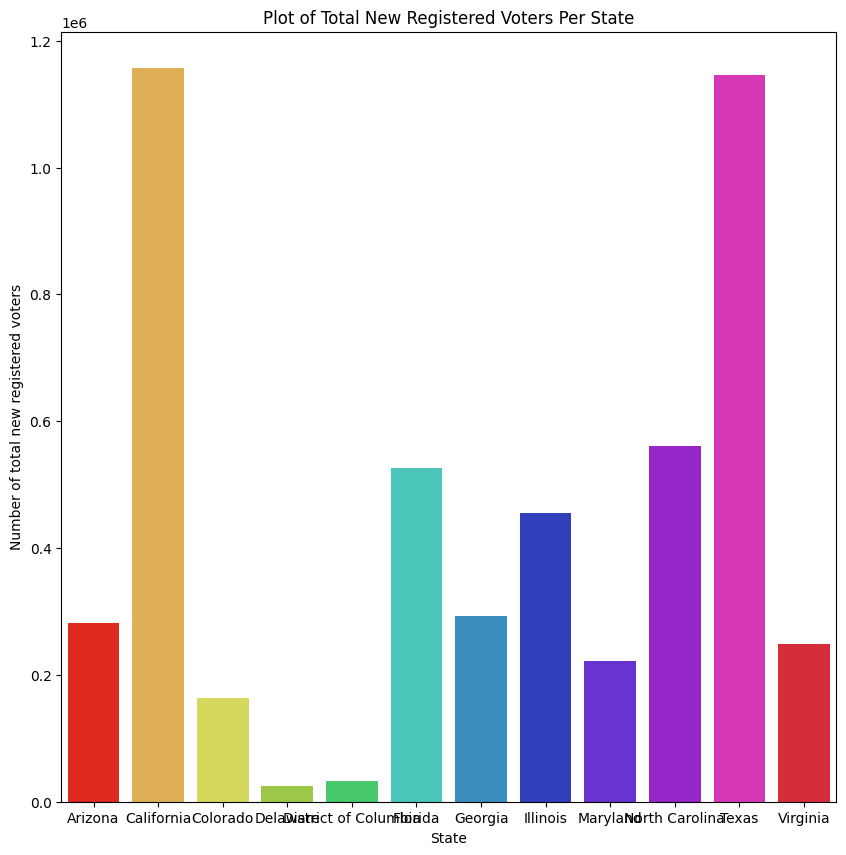

In [32]:
plt.figure(figsize = (10, 10))
colors = ["#ff0d00", "#f5b642", "#e8ed47", "#a4de31", "#31de62", "#36d9c8", "#2790d6", "#1b2dd1", "#5f1aeb", "#9f0be3", "#f01dc6", "#f21124"]

sns.barplot(total_vote, x = "NAME", y = "registered_voters", hue = "NAME", palette = colors)
plt.xlabel("State")
plt.ylabel("Number of total new registered voters")
plt.title("Plot of Total New Registered Voters Per State")

*States with larger populations tended to show higher voter registration, like California and Texas, while smaller population states and territories had less voter registration, like Delaware and District of Colombia. Population may or may not be a factor but cannot be accounted for because population data is not provided in the dataset. But it can be inferred since California and Texas have the largest population of any state, and Delaware and DC trend towards the bottom.*

Produce a plot comparing voter registation in 2016 and 2020. (2 pts)
* Color the graph based on the month.(1 pt)
* Change the default color palette used. (1 pt)
* Comment on any trends you see. (2 pts)
* Add the appropriate labels and title (1)
* Comment on any trends you see (2 points)

(9 pts total)

Text(0.5, 1.0, 'Plot of New Registered Voters Per Month in 2016 and 2020')

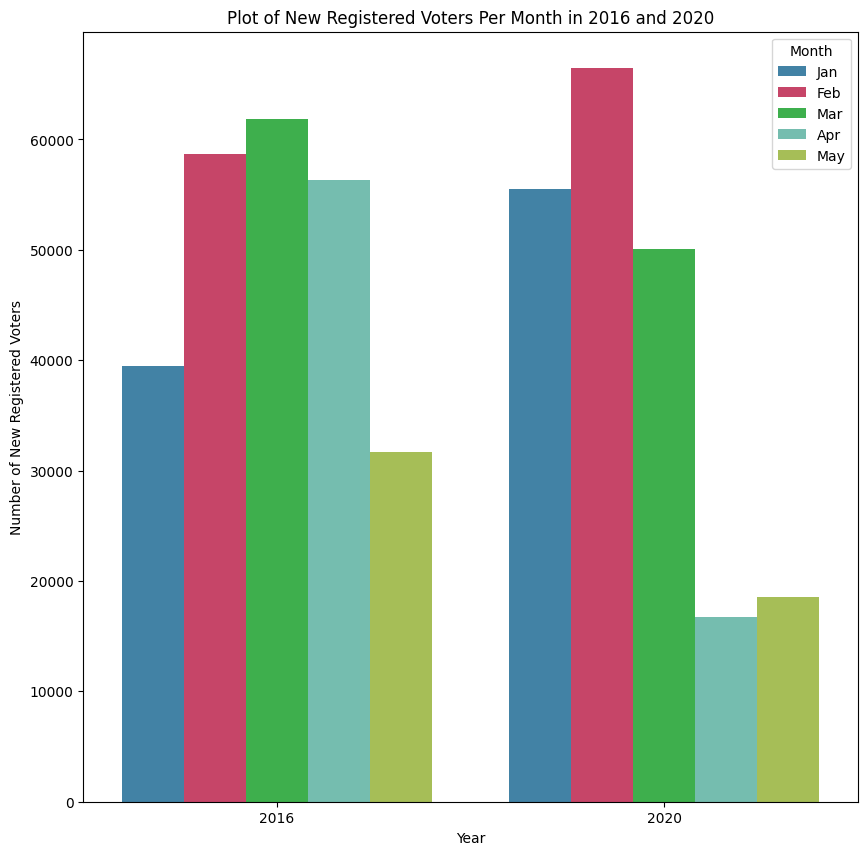

In [37]:
colors = ["#3187b5", "#db305e", "#2bc23f", "#69c9b6", "#afcf46"]

plt.figure(figsize = (10, 10))
sns.barplot(data = voters, x ="Year", y = "registered_voters", palette = colors, hue = "Month", errorbar = None)
plt.xlabel("Year")
plt.ylabel("Number of New Registered Voters")
plt.title("Plot of New Registered Voters Per Month in 2016 and 2020")

*New voter registration was much more even across Jaunary-May in comparison to 2020. The biggest observation to be made is that in 2020 new voter registration peaked in February and experienced a dip in March, followed by a massive decrease during April and May. This gives the 2016 graph a bell-shape curve, and the 2020 graph is skewed right.*
*Both years, however, seemed to follow a similar pattern of new voter registration, as both graphs show an increase followed by a sharper decrease.*

Create a data visualization that relates to either your state level research question or your national level reserach question. If one of your questions was answered by the above graphs, you may not use that question. (12 points)

Text(0.5, 1.0, 'Plot of Average New Registered Voters Per Month (2016 and 2020)')

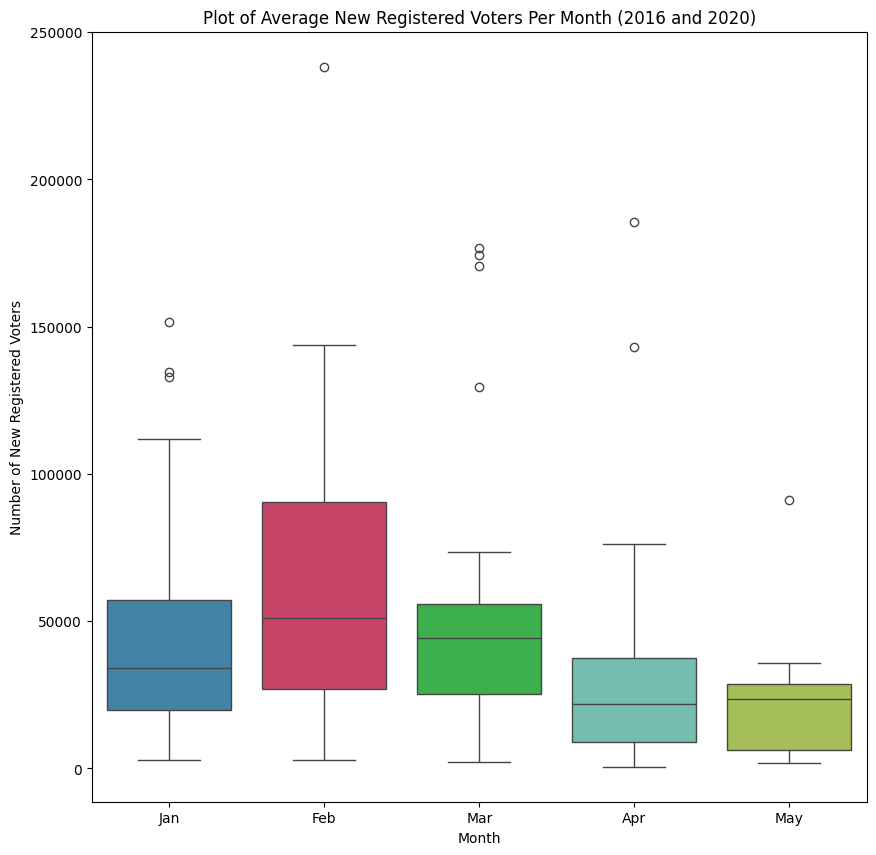

In [36]:
colors = ["#3187b5", "#db305e", "#2bc23f", "#69c9b6", "#afcf46"]

plt.figure(figsize = (10, 10))
sns.boxplot(voters, x = "Month", y = "registered_voters", palette = colors, hue = "Month")
plt.xlabel("Month")
plt.ylabel("Number of New Registered Voters")
plt.title("Plot of Average New Registered Voters Per Month (2016 and 2020)")

*A noticable pattern in this graph is that February has the highest average and maximum number of new registered voters, but also has the greatest outlier. February seems to be a reliable indicator of high new registration counts. Conversely, while May has a smaller minimum-maximum range, it still has a greater mean than April. The graph overall also follows a positive skew, like the graph comparing the months within 2016 and 2020.*

##Mapping (14 points as noted)

Load in our shape file data from the mapping unit.

In [27]:
!git clone https://github.com/SFord87/325-Datasets

fatal: destination path '325-Datasets' already exists and is not an empty directory.


Set our continental US bounding box to us for the next questions. (2 points)

In [28]:
shapefile = '/content/325-Datasets/cb_2018_us_state_500k.shp'

states = gpd.read_file(shapefile)

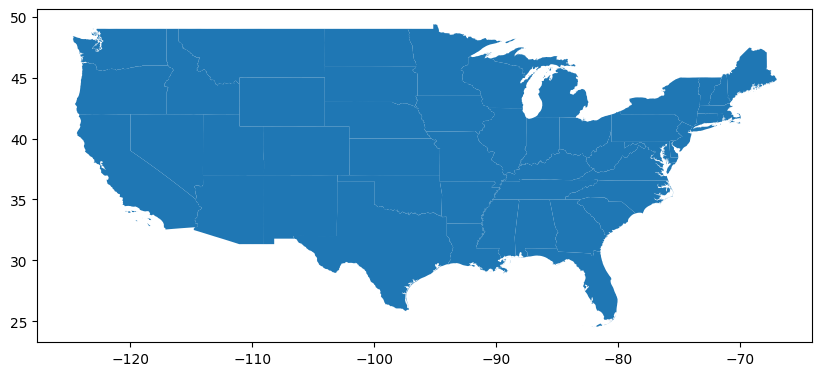

In [29]:
minx, miny, maxx, maxy = -125, 24.396308, -66.93457, 49.384358

bbox = states.cx[minx:maxx, miny:maxy]
bbox.plot(figsize=(10, 10))

plt.show()

Create a dataframe that shows the average voter registration per state. (2 points)

In [7]:
avg_vote = voters.groupby("NAME").registered_voters.mean()

avg_vote

,registered_voters
NAME,
Arizona,35311.500
California,144545.375
Colorado,20527.500
Delaware,3166.375
District of Columbia,3248.400
Florida,65868.125
Georgia,36604.125
Illinois,56840.375
Maryland,22133.500


Merge the above dataframe results with the mapping data. You will want to use `inner` for the `how` argument. (2 points)

In [43]:
state_avg = bbox.merge(avg_vote, on="NAME", how="inner")

state_avg.head(5)

,STATEFP,STATENS,AFFGEOID,GEOID,STUSPS,NAME,LSAD,ALAND,AWATER,geometry,registered_voters
0,37,01027616,0400000US37,37,NC,North Carolina,00,125923656064,13466071395,"MULTIPOLYGON (((-75.72681 35.93584, -75.71827 ...",56040.800
1,51,01779803,0400000US51,51,VA,Virginia,00,102257717110,8528531774,"MULTIPOLYGON (((-75.74241 37.80835, -75.74151 ...",24845.200
2,12,00294478,0400000US12,12,FL,Florida,00,138949136250,31361101223,"MULTIPOLYGON (((-80.17628 25.52505, -80.17395 ...",65868.125
3,48,01779801,0400000US48,48,TX,Texas,00,676653171537,19006305260,"MULTIPOLYGON (((-94.7183 29.72886, -94.71721 2...",114610.100
4,06,01779778,0400000US06,06,CA,California,00,403503931312,20463871877,"MULTIPOLYGON (((-118.60442 33.47855, -118.5987...",144545.375


Make a map featuring the following

*  a figure size of 25, 15 (1 point)
*  A boundary map of the continental US data, with a black linewidth of .25 (2 points)
*  The states that we have the voter registration information for highlighted in a color map of your choice. (3 points)
*  A legend and a title. (2 points)

*Bonus point: add the state abbrevations and average number of registered voters to the map* (1 point)

(8 points total)

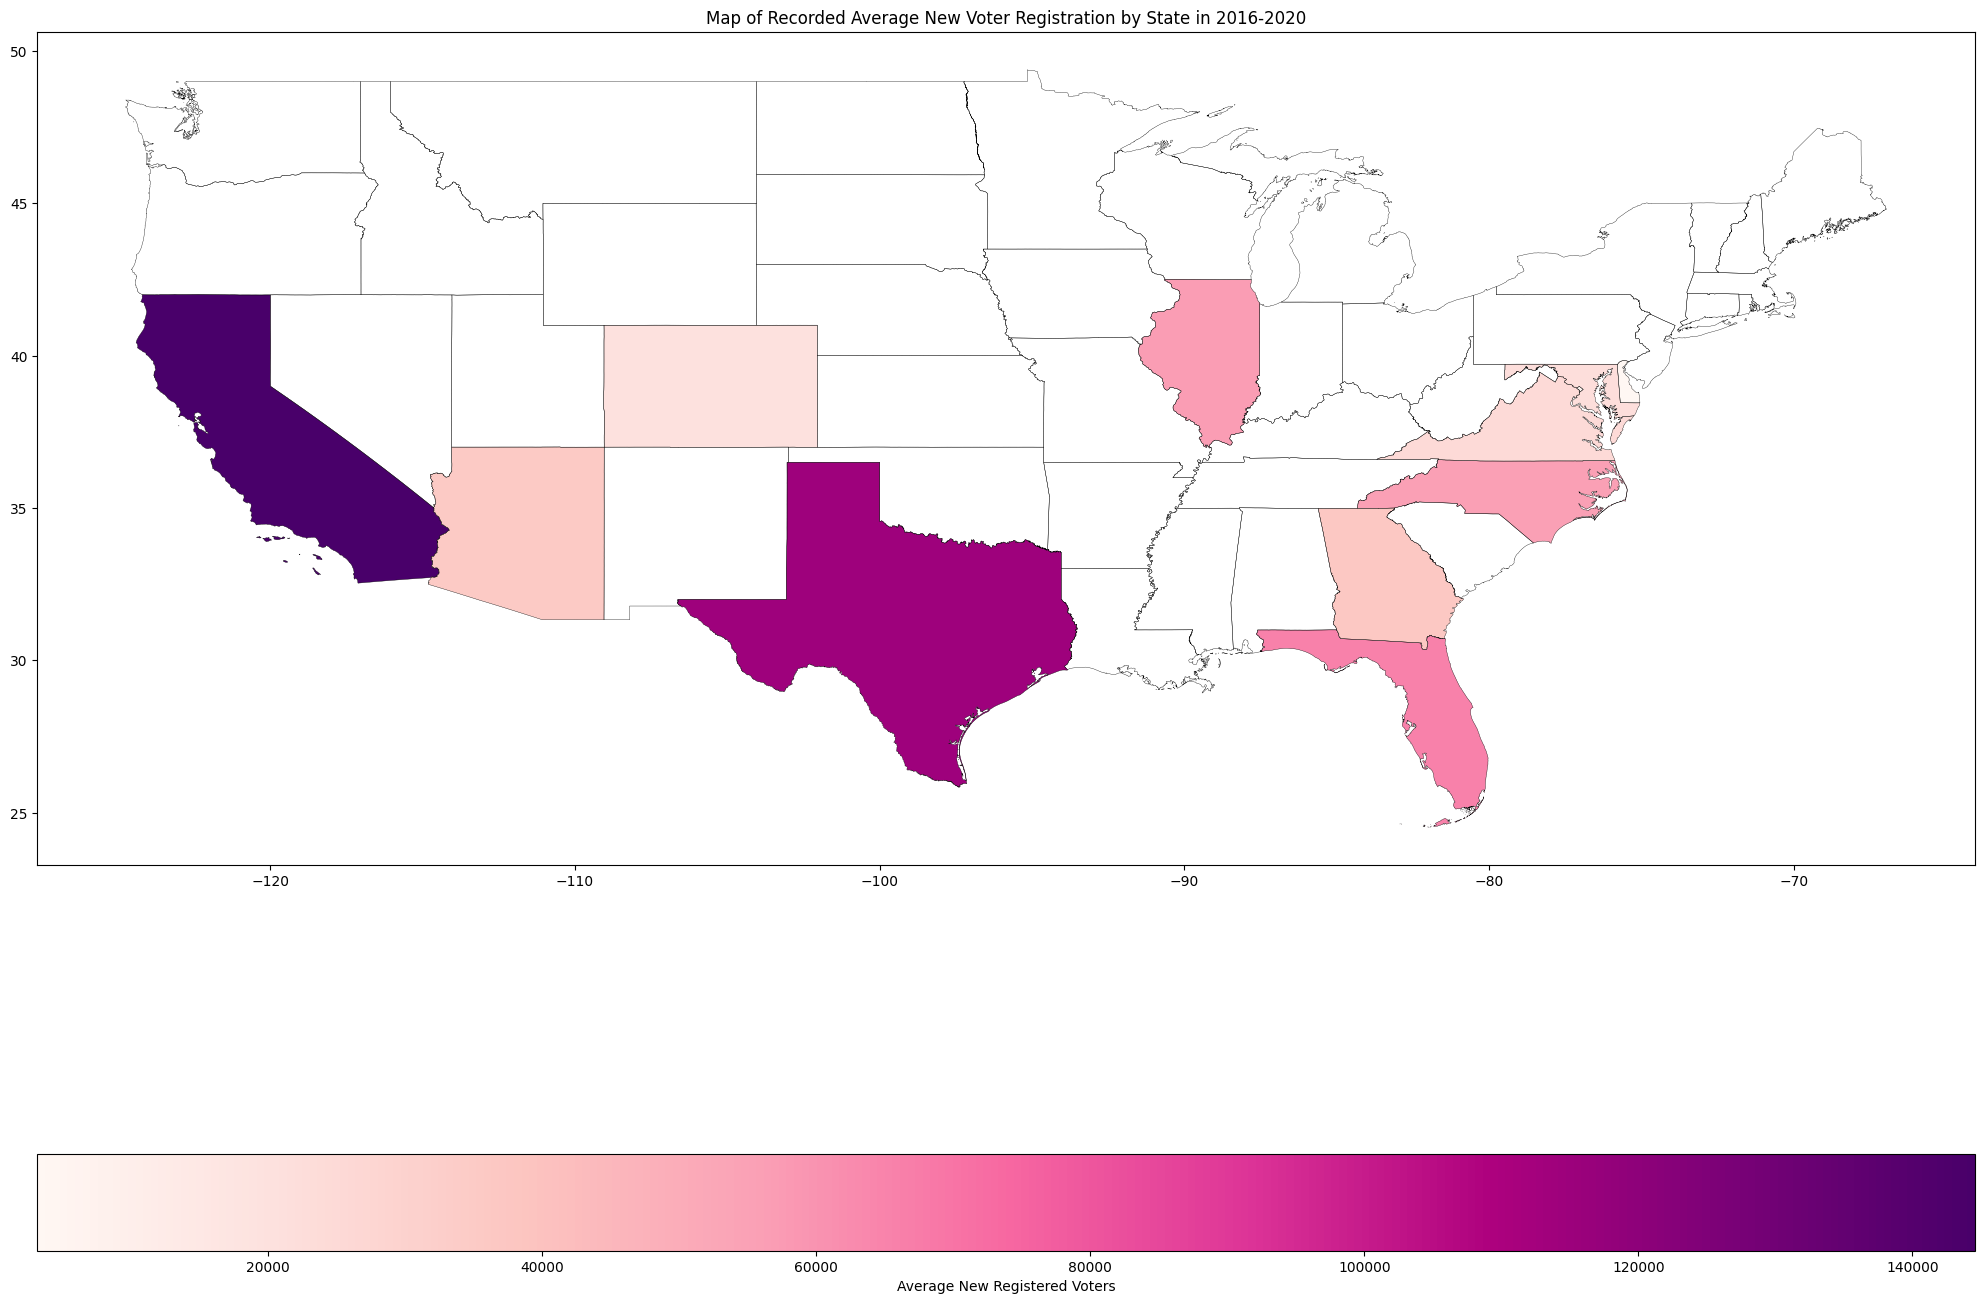

In [53]:
us_map = bbox.boundary.plot(figsize = (25, 25), color = "black", linewidth = .25)

ax = fig.add_subplot()

state_avg.plot(column = "registered_voters", ax = us_map, legend = True, cmap = "RdPu",
            legend_kwds = {"label": "Average New Registered Voters", "orientation": "horizontal"})

plt.title("Map of Recorded Average New Voter Registration by State in 2016-2020")

plt.show()

##Conclusion  (15 points)

Write a conclusion section that includes
* Insights: the insights/outcomes of your notebook (5 points)
* Suggestions: Any suggestions or ideas you could offer your client (5 point)
* Possible next steps: At least one step that you would take if continuing to work with this project (5 points)


Each section should be at least 3-4 complete sentenes.


*The main conclusion of my notebook is that there are time periods within the year in which new voter registration reaches its peak, which can be estimated to be around the months of February-March. These months showed the highest numbers of new registered voters in 2016 and 2020, and are good indicators for the future years. Additionally, new registered voters is positively correlated with state population, with states that had higher populations having more new registered voters.*

*My suggestion would be to act on the insights from this data. For political offices, they can use this data by focusing their campaigns in the peak months as well as in the largest states in order to reach their widest audience. Conversely, a state office from a smaller populated state might look at this data and decide to find ways in which to increase voter registration, like increasing voter registration ads during the peak months of February-March. Additionally, national voter intiatives can look at this data and look to constantly circulate voter registration data during months that did not see as much new voter registration activity in order to raise the number of new registrations during months like April and May.*

*A step that I would have taken if I were to continue working on this project is to keep collecting an increased amount of more specified data. I think that this project would have been greatly enhanced if there was more demographic information, as well as more data collected over a longer time period or if more montly data was included. Having more data would have given me insight into longer patterns and given more possible explanations as to the progression of voting patterns and the demographic makeup of new registered voters.*

*Overall, working on this project was an interesting look into voter data, and I hope that in sharing this project other people come to see how current trends have been established as well as how they can be taken advantage of or changed.*

##Github (3 points)
Post this to your Github and include the accessible link either here or on brightspace.

# Academic Integrity Statement

By writing my name in the cell below, I certify that:

1. I did not use resources other than:
   * the Python notebooks provided by the instructor,
   * links provided in this notebook,
   * the assigned readings, and
   * my own personal notes
2. This means that I did not:
   * look up anything on Google, or Stack Overflow, Chatgpt, &c.,
   * discuss the content of the exam with *anyone* other than the instructors or TAs, or
   * do anything that technically doen't break these rules but is against their spirit.

In [ ]:
ASHLEY HUANG